In [1]:
import numpy as np

In [4]:
# 1.4
A = np.array([[1,1],[1,2]])
A.T@A

array([[2, 3],
       [3, 5]])

In [7]:
# 1.7
A = np.array([[2,10,-2], [3,2,-2], [8,14,-6]]).T
np.linalg.matrix_rank(A)

2

# 3. Линейная регрессия по методу наименьших квадратов

In [8]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
from sklearn import datasets # для импорта данных
import seaborn as sns # для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

# загружаем датасет
boston = datasets.load_boston()
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
boston_data['PRICE'] = boston.target
boston_data.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# составляем матрицу А и вектор целевой переменной
CRIM = boston_data['CRIM']
RM = boston_data['RM']
A = np.column_stack((np.ones(506), CRIM, RM))
y = boston_data[['PRICE']]
print(A)

[[1.0000e+00 6.3200e-03 6.5750e+00]
 [1.0000e+00 2.7310e-02 6.4210e+00]
 [1.0000e+00 2.7290e-02 7.1850e+00]
 ...
 [1.0000e+00 6.0760e-02 6.9760e+00]
 [1.0000e+00 1.0959e-01 6.7940e+00]
 [1.0000e+00 4.7410e-02 6.0300e+00]]


In [10]:
# проверим размерность
print(A.shape)
## (506, 3)

(506, 3)


In [11]:
# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-29.24471945]
 [ -0.26491325]
 [  8.39106825]]


In [12]:
# добавились новые данные:
CRIM_new = 0.1
RM_new = 8
# делаем прогноз типичной стоимости дома
PRICE_new = w_hat.iloc[0]+w_hat.iloc[1]*CRIM_new+w_hat.iloc[2]*RM_new
print(PRICE_new.values)
## [37.85733519]

[37.85733519]


In [13]:
# → Согласитесь, такая запись вычисления оценки стоимости слишком длинная и неудобная, особенно если факторов не два, как у нас, а 200. 
# Более короткий способ сделать прогноз — вычислить скалярное произведение вектора признаков и коэффициентов регрессии.

# короткий способ сделать прогноз
new=np.array([[1,CRIM_new,RM_new]])
print('prediction:', (new@w_hat).values)
## prediction: [[37.85733519]]

prediction: [[37.85733519]]


In [14]:
#Мы уже знаем, что алгоритм построения модели линейной регрессии по МНК реализован в классе LinearRegression, 
# находящемся в модуле sklearn.linear_model. 
# Для вычисления коэффициентов (обучения модели) нам достаточно передать в метод fit() нашу матрицу с наблюдениями и вектор целевой переменной,
# а для построения прогноза — вызвать метод predict():

from sklearn.linear_model import LinearRegression
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)
new_prediction = model.predict(new)
print('prediction:', new_prediction)
## w_hat: [[-29.24471945  -0.26491325   8.39106825]]
## prediction: [[37.85733519]]

w_hat: [[-29.24471945  -0.26491325   8.39106825]]
prediction: [[37.85733519]]


In [16]:
# 3.5
# Сделайте прогноз типичной стоимости (в тыс. долларов) дома в городе с уровнем преступности  и средним количеством комнат в доме 
CRIM_new = 0.2
RM_new = 6 
# В качестве модели используйте линейную регрессию, оценка вектора коэффициентов которой равна: 
# w_hat = [[-29.24471945  -0.26491325   8.39106825]]

new=np.array([[1,CRIM_new,RM_new]])
print('prediction:', (new@w_hat).values)
#Ответ округлите до целого числа.


prediction: [[21.04870738]]


# ОСОБЕННОСТИ КЛАССА LINEAR REGRESSION БИБЛИОТЕКИ SKLEARN

Давайте посмотрим, что «скажет» Python, если мы попробуем построить модель линейной регрессии на вырожденной матрице наблюдений, используя классическую формулу линейной регрессии.

In [17]:
# создадим вырожденную матрицу А
A = np.array([
    [1, 1, 1, 1], 
    [2, 1, 1, 2], 
    [-2, -1, -1, -2]]
).T
y = np.array([1, 2, 5, 1])
# вычислим OLS-оценку для коэффициентов
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat) 
## LinAlgError: Singular matrix

LinAlgError: Singular matrix

Попробуем обучить модель линейной регрессии LinearRegression из модуля sklearn, используя нашу вырожденную матрицу :

In [18]:
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(A, y)
print('w_hat:', model.coef_)
## w_hat: [ 6.   -1.25  1.25]

w_hat: [ 6.   -1.25  1.25]


In [19]:
# Примечание. На самом деле сингулярное разложение зашито в функцию np.linalg.lstsq(), которая позволяет в одну строку построить модель линейной регрессии по МНК:

# классическая OLS-регрессия в numpy с возможностью получения решения даже для вырожденных матриц
np.linalg.lstsq(A, y, rcond=None)

(array([ 6.  , -1.25,  1.25]),
 array([], dtype=float64),
 2,
 array([4.86435029e+00, 5.81460412e-01, 3.42443768e-17]))

# 4. Стандартизация векторов и матрица корреляций

In [20]:
boston_data[['CHAS', 'LSTAT', 'CRIM','RM']].describe()

,CHAS,LSTAT,CRIM,RM
count,506.000000,506.000000,506.000000,506.000000
mean,0.069170,12.653063,3.613524,6.284634
std,0.253994,7.141062,8.601545,0.702617
min,0.000000,1.730000,0.006320,3.561000
25%,0.000000,6.950000,0.082045,5.885500
50%,0.000000,11.360000,0.256510,6.208500
75%,0.000000,16.955000,3.677083,6.623500
max,1.000000,37.970000,88.976200,8.780000


In [21]:
# Рассмотрим модель линейной регрессии по МНК без стандартизации. Помним, что необходимо добавить столбец из единиц:

# составляем матрицу наблюдений и вектор целевой переменной
A = np.column_stack((np.ones(506), boston_data[['CHAS', 'LSTAT', 'CRIM','RM']]))
y = boston_data[['PRICE']]
# вычисляем OLS-оценку для коэффициентов без стандартизации
w_hat=np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-1.92052548]
 [ 3.9975594 ]
 [-0.58240212]
 [-0.09739445]
 [ 5.07554248]]


Сначала центрируем векторы, которые находятся в столбцах матрицы . Для этого вычтем среднее, вычисленное по строкам матрицы  в каждом столбце, с помощью метода mean(). Затем разделим результат на длины центрированных векторов, вычисленных с помощью функции linalg.norm().

Примечание. Обратите внимание, что для функции linalg.norm() обязательно необходимо указать параметр axis=0, так как по умолчанию норма считается для всей матрицы, а не для каждого столбца в отдельности. С определением нормы матрицы и тем, как она считается, вы можете ознакомиться в документации к функции norm().

In [22]:
# составляем матрицу наблюдений без дополнительного столбца из единиц
A = boston_data[['CHAS', 'LSTAT', 'CRIM','RM']]
y = boston_data[['PRICE']]
# стандартизируем векторы в столбцах матрицы A
A_cent = A - A.mean()
A_st = A_cent/np.linalg.norm(A_cent, axis=0)
A_st.describe().round(2)

,CHAS,LSTAT,CRIM,RM
count,506.00,506.00,506.00,506.00
mean,-0.00,-0.00,-0.00,-0.00
std,0.04,0.04,0.04,0.04
min,-0.01,-0.07,-0.02,-0.17
25%,-0.01,-0.04,-0.02,-0.03
50%,-0.01,-0.01,-0.02,-0.00
75%,-0.01,0.03,0.00,0.02
max,0.16,0.16,0.44,0.16


In [23]:
# Теперь векторы имеют одинаковые средние значения и стандартные отклонения. 
# Если вычислить длину каждого из векторов, мы увидим, что они будут равны 1:

print(np.linalg.norm(A_st, axis=0))
## [1. 1. 1. 1.]

[1. 1. 1. 1.]


In [24]:
# Для получения стандартизированных коэффициентов нам также понадобится стандартизация целевой переменной  по тому же принципу:

# стандартизируем вектор целевой переменной
y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent)

In [25]:
# вычислим OLS-оценку для стандартизированных коэффициентов
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st
print(w_hat_st.values)

[[ 0.11039956]
 [-0.45220423]
 [-0.09108766]
 [ 0.38774848]]


In [26]:
# матрица Грама
A_st.T @ A_st

,CHAS,LSTAT,CRIM,RM
CHAS,1.000000,-0.053929,-0.055892,0.091251
LSTAT,-0.053929,1.000000,0.455621,-0.613808
CRIM,-0.055892,0.455621,1.000000,-0.219247
RM,0.091251,-0.613808,-0.219247,1.000000


In [28]:
# 4.3
# Стандартизируйте вектор 
x = np.array([12,8]).T
# , приведя его к единичной длине. 
# В качестве ответа введите координаты полученного вектора. Ответ округлите до третьего знака после точки-разделителя.
x_cent = x - x.mean()
x_std = x_cent/np.linalg.norm(x_cent)
x_std

array([ 0.70710678, -0.70710678])

# КОРРЕЛЯЦИОННАЯ МАТРИЦА

In [29]:
# Примечание. В NumPy матрица корреляций вычисляется функцией np.corrcoef():

x_1 = np.array([1, 2, 6])
x_2 = np.array([3000, 1000, 2000])
np.corrcoef(x_1, x_2)

array([[ 1.        , -0.18898224],
       [-0.18898224,  1.        ]])

In [30]:
# В Pandas матрица корреляций вычисляется методом corr(), вызванным от имени DataFrame.

In [31]:
# 4.7
# Вычислите коэффициент корреляции между векторами  y = 5,1,2 и u = 4,2,8.
y = np.array([5,1,2]).T
u = np.array([4,2,8]).T
np.corrcoef(y,u)

array([[1.        , 0.05241424],
       [0.05241424, 1.        ]])

In [42]:
# 4.8
# Составьте корреляционную матрицу для системы векторов:
x1 = np.array([5.1, 1.8, 2.1, 10.3, 12.1, 12.6])
x2 = np.array([10.2, 3.7, 4.1, 20.5, 24.2, 24.1])
x3 = np.array([2.5, 0.9, 1.1, 5.1, 6.1, 6.3])
#Для расчёта используйте библиотеку NumPy или Pandas.

x = np.array([x1,x2,x3]).T
x = pd.DataFrame(x)
cor = x.corr()
#1. Чему равен ранг полученной корреляционной матрицы?
print('rank=', np.linalg.matrix_rank(cor))
#2.Чему равен определитель полученной корреляционной матрицы? Ответ округлите до седьмого знака после точки-разделителя.
print('det=', np.linalg.det(cor))

rank= 3
det= 4.862298229242395e-07


# 5. Практика: линейная регрессия и метод наименьших квадратов

In [43]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [151]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [152]:
# 5.1
# Постройте корреляционную матрицу факторов, включив в неё целевой признак. Ответьте на следующие вопросы:

corr = data.corr()
print(corr)
print(np.linalg.matrix_rank(corr))
print(np.linalg.det(corr))

             Well       Por      Perm        AI   Brittle       TOC        VR  \
Well     1.000000  0.068927  0.077928  0.041483 -0.079252  0.022624 -0.007279   
Por      0.068927  1.000000  0.760546 -0.461549 -0.218570  0.711831  0.111860   
Perm     0.077928  0.760546  1.000000 -0.239636 -0.124017  0.471746  0.051023   
AI       0.041483 -0.461549 -0.239636  1.000000  0.127599 -0.531864  0.499143   
Brittle -0.079252 -0.218570 -0.124017  0.127599  1.000000 -0.214282  0.317929   
TOC      0.022624  0.711831  0.471746 -0.531864 -0.214282  1.000000  0.299483   
VR      -0.007279  0.111860  0.051023  0.499143  0.317929  0.299483  1.000000   
Prod     0.026817  0.861910  0.727426 -0.390835  0.237155  0.654445  0.323182   

             Prod  
Well     0.026817  
Por      0.861910  
Perm     0.727426  
AI      -0.390835  
Brittle  0.237155  
TOC      0.654445  
VR       0.323182  
Prod     1.000000  
8
0.0007299388072652082


In [153]:
# 5.2
# Создайте матрицу наблюдений. Обозначьте её за X, а вектор правильных ответов — за y .

# 1. Постройте модель линейной регрессии по методу наименьших квадратов. 
# Для этого используйте матричную формулу NumPy. 
# В качестве ответа укажите полученные оценки коэффициентов модели. Ответ округлите до целого числа.

y = data['Prod']
X = data.drop('Prod', axis=1)
index = ['intersept'] + list(X.columns)
X = np.column_stack((np.ones(200), X))

w_hat = np.linalg.inv(X.T@X)@X.T@y
print(pd.Series(np.round(w_hat, 0), index=index))


intersept   -1232.0
Well            0.0
Por           230.0
Perm          116.0
AI           -365.0
Brittle        25.0
TOC           -78.0
VR            785.0
dtype: float64


In [154]:
# 5.3
# Далее потренируемся строить предсказание для наблюдений целевой переменной.

# 1. Постройте прогноз выработки газа для скважины с параметрами, указанными ниже. 
# Чему равна абсолютная ошибка построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день).
# Ответ округлите до целого числа.

new=np.array([[1,106,15.32,3.71,3.29,55.99,1.35,2.42]])
y_new = 4748.315024
y_pred = (new@w_hat)
o = y_pred-y_new

print(o)

# 2. Постройте прогноз выработки газа для всех скважин из обучающего набора данных. 
# Чему равно значение метрики MAPE вашей модели? 
# Ответ приведите в процентах (не указывайте знак процента), округлив его до первого знака после точки-разделителя.

from sklearn import metrics
pred = X@w_hat
print(metrics.mean_absolute_percentage_error(y,pred))

[-25.25097029]
0.03627946845133415


[-1.23230803e+03  5.07003631e-02  2.30179140e+02  1.16239006e+02
 -3.65202301e+02  2.49943700e+01 -7.84009294e+01  7.85259815e+02]
             Well       Por      Perm        AI   Brittle       TOC        VR  \
Well     1.000000  0.068927  0.077928  0.041483 -0.079252  0.022624 -0.007279   
Por      0.068927  1.000000  0.760546 -0.461549 -0.218570  0.711831  0.111860   
Perm     0.077928  0.760546  1.000000 -0.239636 -0.124017  0.471746  0.051023   
AI       0.041483 -0.461549 -0.239636  1.000000  0.127599 -0.531864  0.499143   
Brittle -0.079252 -0.218570 -0.124017  0.127599  1.000000 -0.214282  0.317929   
TOC      0.022624  0.711831  0.471746 -0.531864 -0.214282  1.000000  0.299483   
VR      -0.007279  0.111860  0.051023  0.499143  0.317929  0.299483  1.000000   
Prod     0.026817  0.861910  0.727426 -0.390835  0.237155  0.654445  0.323182   

             Prod  
Well     0.026817  
Por      0.861910  
Perm     0.727426  
AI      -0.390835  
Brittle  0.237155  
TOC      0.654445  

<AxesSubplot:>

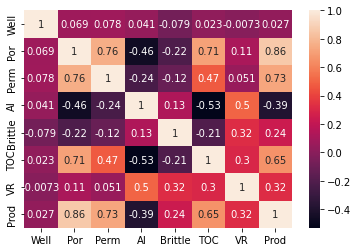

In [155]:
# 5.4
# Настало время анализа построенной модели. 
# Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, 
# которые вы нашли ранее.

# 1. Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? 
# Например, корреляция говорит, что зависимость между фактором и целью прямая, а модель говорит обратное.

# Если такой фактор есть, выберите его название из списка. Если таких факторов несколько, выберите их все:

print(w_hat)
print(corr)
sns.heatmap(corr,annot=True)

intersept   -1835.0
Por           293.0
AI           -200.0
Brittle        28.0
VR            517.0
dtype: float64
0.04044138420436065


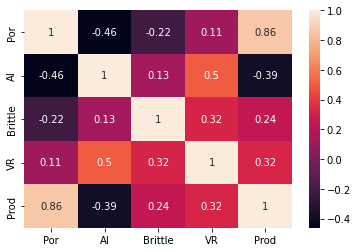

In [156]:
# 5.5
# 1. Исключите из данных сильно коррелированные между собой факторы. 
# Под сильной корреляцией в данной задаче будем понимать значения, выше 0.7. 
# Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: 
# оставляйте тот фактор, который больше всего коррелирует с объёмом добычи газа.

# Также исключите из данных факторы, для которых корреляция с целевой переменной меньше 0.05.

delete = ['Perm', 'TOC', 'Well']
new_data = data.drop(delete,axis=1)

sns.heatmap(new_data.corr(), annot = True)

# 2. Постройте линейную регрессию на обновлённых после удаления факторов данных по методу наименьших квадратов. 
# Для этого используйте матричную формулу NumPy.

# В качестве ответа укажите полученные оценки коэффициентов модели. Ответ округлите до целого числа.
y = new_data['Prod']
X = new_data.drop('Prod', axis=1)
index = ['intersept'] + list(X.columns)
X = np.column_stack((np.ones(200), X))

w_hat = np.linalg.inv(X.T@X)@X.T@y
print(pd.Series(np.round(w_hat, 0), index=index))

# 3. Сделайте прогноз для всего обучающего набора данных и рассчитайте метрику MAPE (Mean Absolute Percentage Error). 
# Результат приведите в процентах (не указывайте знак процента), округлив его до первого знака после точки-разделителя.

pred = X@w_hat
print(metrics.mean_absolute_percentage_error(y,pred))

# 6. Полиномиальная регрессия

In [103]:
A = np.array([
    [1, 1, 1, 1],
    [1, 3, -2, 1],
    [1, 9, 4, 1]
]).T
y = np.array([4, 5, 2, 2])
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat) 
# [2.4        0.46666667 0.13333333]

[2.4        0.46666667 0.13333333]


In [104]:
A = np.array([
    [1, 1, 1, 1, 1, 1, 1],
    [1, 3, -2, 1, 5, 13, 1],
    [3, 4, 5, -2, 4, 11, 3],
    [1, 9, 4, 1, 25, 169, 1],
    [3, 12, -10, -2, 20, 143, 3],
    [9, 16, 25, 4, 16, 121, 9]
    
]).T
y = np.array([4, 5, 2, 2, 6, 8, -1])
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat)
## [-2.25799015  2.37672337 -0.1322068  -0.10208147 -0.26501791  0.29722471]

[-2.25799015  2.37672337 -0.1322068  -0.10208147 -0.26501791  0.29722471]


Конечно, вручную создавать полиномиальные столбцы в матрице наблюдений мы не будем. В модуле «ML-2. Обучение с учителем: регрессия» мы с вами уже знакомились с полиномиальными признаками, генерация которых реализована в классе PolynomialFeatures из модуля preprocessing. 

Потренируемся на следующем примере

In [105]:
A = np.array([
    [1, 3, -2, 1, 5, 13, 1],
    [3, 4, 5, -2, 4, 11, 3],
    [4, 5, 2, 2, 6, 8, -1],
]).T
print(A)

[[ 1  3  4]
 [ 3  4  5]
 [-2  5  2]
 [ 1 -2  2]
 [ 5  4  6]
 [13 11  8]
 [ 1  3 -1]]


In [106]:
# Затем импортируем класс PolynomialFeatures из библиотеки sklearn. 
# Создадим объект этого класса, указав при инициализации степень полинома равной 2. 
# Также укажем, что нам нужна генерация столбца из 1 (параметр include_bias=True):

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)

In [107]:
A_poly = poly.fit_transform(A)
display(pd.DataFrame(A_poly))

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,9.0,12.0,16.0
1,1.0,3.0,4.0,5.0,9.0,12.0,15.0,16.0,20.0,25.0
2,1.0,-2.0,5.0,2.0,4.0,-10.0,-4.0,25.0,10.0,4.0
3,1.0,1.0,-2.0,2.0,1.0,-2.0,2.0,4.0,-4.0,4.0
4,1.0,5.0,4.0,6.0,25.0,20.0,30.0,16.0,24.0,36.0
5,1.0,13.0,11.0,8.0,169.0,143.0,104.0,121.0,88.0,64.0
6,1.0,1.0,3.0,-1.0,1.0,3.0,-1.0,9.0,-3.0,1.0


А теперь построим модель полиномиальной регрессии на реальных данных.

Возьмём все те же данные о стоимости жилья в районах Бостона. Будем использовать следующие четыре признака: LSTAT, CRIM, PTRATIO и RM. С их помощью мы построим полиномиальную регрессию от первой до пятой степени включительно, а затем сравним результаты по значению средней абсолютной процентной ошибки (MAPE).

Чтобы не дублировать код, объявим функцию polynomial_regression(). Она будет принимать на вход матрицу наблюдений, вектор ответов и степень полинома, а возвращать матрицу с полиномиальными признаками, вектор предсказаний и коэффициенты регрессии, найденные по МНК:

In [108]:
def polynomial_regression(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=True)
    X_poly = poly.fit_transform(X)
    w_hat = np.linalg.inv(X_poly.T@X_poly)@X_poly.T@y
    y_pred = X_poly @ w_hat
    return X_poly, y_pred, w_hat

In [112]:
A = boston_data[['LSTAT', 'PTRATIO', 'RM', 'CRIM']]
y = boston_data[['PRICE']]
 
A_poly, y_pred, w_hat = polynomial_regression(A, y, 1)
A_poly2, y_pred2, w_hat2 = polynomial_regression(A, y, 2)
A_poly3, y_pred3, w_hat3 = polynomial_regression(A, y, 3)
A_poly4, y_pred4, w_hat4 = polynomial_regression(A, y, 4)
A_poly5, y_pred5, w_hat5 = polynomial_regression(A, y, 5)

In [113]:
# Посмотрим на качество построенных регрессий, вычислив метрику:

from sklearn.metrics import mean_absolute_percentage_error
 
print('MAPE для полинома 1-й степени {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred)*100))
print('MAPE для полинома 2-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred2)*100))
print('MAPE для полинома 3-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred3)*100))
print('MAPE для полинома 4-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred4)*100))
print('MAPE для полинома 5-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred5)*100))
## MAPE для полинома 1-й степени 18.20%
## MAPE для полинома 2-й степени  13.41%
## MAPE для полинома 3-й степени  12.93%
## MAPE для полинома 4-й степени  10.74%
## MAPE для полинома 5-й степени  5328.16%

MAPE для полинома 1-й степени 18.20%
MAPE для полинома 2-й степени  13.41%
MAPE для полинома 3-й степени  12.93%
MAPE для полинома 4-й степени  10.73%
MAPE для полинома 5-й степени  1092.80%


In [114]:
display(pd.DataFrame(w_hat5).describe())

,PRICE
count,126.000000
mean,1133.563801
std,30817.017070
min,-144241.899739
25%,-0.684799
50%,-0.000308
75%,1.530654
max,308300.929269


In [115]:
# считаем матрицу корреляций (без столбца из единиц)
C = pd.DataFrame(A_poly5[:, 1:]).corr()
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))
# считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', A_poly5[:, 1:].shape[1])
# Ранг корреляционной матрицы: 110
# Количество факторов: 125

Ранг корреляционной матрицы: 110
Количество факторов: 125


Кстати, заметим, что, например, для полинома четвёртой степени ранг матрицы корреляций максимален, то есть равен количеству факторов (не включая единичный столбец):


In [116]:

# считаем матрицу корреляций (без столбца из единиц)
C = pd.DataFrame(A_poly4[:, 1:]).corr()
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))
# считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', A_poly4[:, 1:].shape[1])
## Ранг корреляционной матрицы: 69
## Количество факторов: 69


Ранг корреляционной матрицы: 69
Количество факторов: 69


In [117]:
display(pd.DataFrame(w_hat4).describe())

,PRICE
count,70.000000
mean,-50.785591
std,886.319182
min,-6916.525964
25%,-0.187934
50%,-0.000810
75%,0.322186
max,2304.602371


А теперь посмотрим, что будет, если использовать для построения полиномиальной регрессии реализацию из библиотеки sklearn. Создадим функцию polynomial_regression_sk — она будет делать то же самое, что и прошлая функция, но средствами sklearn. Дополнительно будем смотреть также стандартное отклонение (разброс) по коэффициентам регрессии.

In [118]:
def polynomial_regression_sk(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=False)
    X_poly = poly.fit_transform(X)
    lr = LinearRegression().fit(X_poly, y)
    y_pred = lr.predict(X_poly)
    return X_poly, y_pred, lr.coef_

A = boston_data[['LSTAT', 'PTRATIO', 'RM', 'CRIM']]
y = boston_data[['PRICE']]

for k in range(1, 6):
    A_poly, y_pred, w_hat = polynomial_regression_sk(A, y, k)
    print(
        "MAPE для полинома степени {} — {:.2f}%, СКО — {:.0f}".format(
            k, mean_absolute_percentage_error(y, y_pred)*100, w_hat.std()
        )

    )
## MAPE для полинома степени 1 — 0.68, СКО — 2
## MAPE для полинома степени 2 — 0.81, СКО — 5
## MAPE для полинома степени 3 — 0.86, СКО — 9
## MAPE для полинома степени 4 — 0.91, СКО — 304
## MAPE для полинома степени 5 — 0.93, СКО — 17055

MAPE для полинома степени 1 — 18.20%, СКО — 2
MAPE для полинома степени 2 — 13.41%, СКО — 5
MAPE для полинома степени 3 — 12.93%, СКО — 9
MAPE для полинома степени 4 — 10.74%, СКО — 304
MAPE для полинома степени 5 — 9.02%, СКО — 17055


In [127]:
# 6.1
# Построена модель полиномиальной регрессии следующего вида:
# Поступило новое наблюдение, которое характеризуется вектором .

# Сделайте прогноз целевой переменной с помощью полученной полиномиальной регрессии. 
# Ответ округлите до первого знака после точки-разделителя

y_pred = 10.4 +8 + 0.5*4 + 3+ 0.4*4*4
y_pred

29.799999999999997

In [131]:
# 6.2
# Строится полиномиальная регрессия второй степени от одного фактора . Как будет выглядеть матрица наблюдений , если: x = 1,3,-2,9 
X = np.array([1,3,-2,9]).T 
X = X.reshape(4,1)
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(X)
display(pd.DataFrame(X_poly))

,0,1,2
0,1.0,1.0,1.0
1,1.0,3.0,9.0
2,1.0,-2.0,4.0
3,1.0,9.0,81.0


In [133]:
# 6.5
# С помощью классического МНК найдите коэффициенты полиномиальной регрессии, 
# если используется полином второй степени и задан фактор  и целевая переменная

x = np.array([1,3,-2,9])
y = np.array([3,7,-5,21])
x = x.reshape(4,1)
y = y.reshape(4,1)

poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(x)
w_hat = np.linalg.inv(X_poly.T@X_poly)@X_poly.T@y
w_hat

array([[ 0.11446013],
       [ 2.46095638],
       [-0.01608801]])

# 7. Регуляризация

Обучим модель полиномиальной регрессии третьей степени. Будем использовать данные о жилье в Бостоне и возьмём следующие четыре признака: LSTAT, CRIM, PTRATIO и RM.

Для оценки качества модели будем использовать кросс-валидацию и сравнивать среднее значение метрики на тренировочных и валидационных фолдах. Кросс-валидацию организуем с помощью функции cross_validate из модуля model_selection:

In [134]:
from sklearn.model_selection import cross_validate

In [138]:
# выделяем интересующие нас факторы
X = boston_data[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston_data[['PRICE']]
 
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
 
# создаём модель линейной регрессии
lr = LinearRegression()
 
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(lr, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))	
 
## MAPE на тренировочных фолдах: 12.64 %
## MAPE на валидационных фолдах: 24.16 %

MAPE на тренировочных фолдах: 12.64 %
MAPE на валидационных фолдах: 24.16 %


In [139]:
# Здесь Очевидно, что матрица  вырождена: её второй и третий столбцы являются пропорциональными с коэффициентом 2. 
# Значит, наша классическая формула МНК  (без сингулярного разложения) не сработает.

# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии по МНК
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat) 
## LinAlgError: Singular matrix

LinAlgError: Singular matrix

In [140]:
# Попробуем найти вектор оценок весов  по формуле:

# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# единичная матрица
E = np.eye(3)
# коэффициент регуляризации 
alpha = 5
# получаем оценку коэффициентов регрессии по МНК с регуляризацией Тихонова
w_hat_ridge = np.linalg.inv(A.T@A+alpha*E)@A.T@y
print(w_hat_ridge) 
## [0.6122449  0.29387755 0.5877551 ]

[0.6122449  0.29387755 0.5877551 ]


## L2-РЕГУЛЯРИЗАЦИЯ

Напомним, что за реализацию линейной регрессии в sklearn отвечает класс Ridge. Основной параметр модели, на который стоит обратить внимание — alpha, коэффициент регуляризации из формулы Тихонова.

In [141]:
from sklearn.linear_model import Ridge

# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии по МНК с регуляризацией Тихонова
ridge = Ridge(alpha=5, fit_intercept=False)
ridge.fit(A, y)
print(ridge.coef_) 
## [0.6122449  0.29387755 0.5877551 ]

[0.6122449  0.29387755 0.5877551 ]


Наконец, посмотрим, как регуляризация поможет побороть переобучение модели полиномиальной регрессии на наборе данных о домах в Бостоне. Используем те же самые признаки: LSTAT, CRIM, PTRATIO и RM. 

→ Сразу отметим, что для успешной сходимости численных методов оптимизации, которые используются для решения задачи условной оптимизации, необходима стандартизация (нормализация) исходных данных, которая не требовалась для аналитического МНК в классической линейной регрессии (LinearRegression).

In [142]:
from sklearn.preprocessing import StandardScaler

# выделяем интересующие нас факторы
X = boston_data[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston_data[['PRICE']]
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
# создаём модель линейной регрессии c L2-регуляризацией
ridge = Ridge(alpha=20, solver='svd')
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(ridge, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))
## MAPE на тренировочных фолдах: 12.54 %
## MAPE на валидационных фолдах: 17.02 %

MAPE на тренировочных фолдах: 12.54 %
MAPE на валидационных фолдах: 17.02 %


In [144]:
# 7.4
# Вычислите коэффициенты линейной регрессии с -регуляризацией, используя аналитическую формулу Тихонова, если:
# коэффициент = 1
# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1,1,1,1,1],
    [5,9,4,3,5],
    [15,18,18,19,19],
    [7,6,7,7,7]
]).T
# вектор целевого признака
y = np.array([24,22,35,33,36])
# получаем оценку коэффициентов регрессии по МНК с регуляризацией Тихонова
ridge = Ridge(alpha=1, fit_intercept=False)
ridge.fit(A, y)
print(ridge.coef_) 


[-0.08523045 -1.70784126  1.91141216  0.7293992 ]


## L1-РЕГУЛЯРИЗАЦИЯ

In [146]:
from sklearn.linear_model import Lasso

# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии с помощью L1-регуляризации
lasso = Lasso(alpha=0.1, fit_intercept=False)
lasso.fit(A, y)
print(lasso.coef_)
## [1.14925373 0.         0.71921642]

[1.14925373 0.         0.71921642]


In [147]:
# выделяем интересующие нас факторы
X = boston_data[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston_data[['PRICE']]

# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)

# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)

# создаём модель линейной регрессии c L1-регуляризацией
lasso = Lasso(alpha=0.1, max_iter=10000)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))
## MAPE на тренировочных фолдах: 12.44 %
## MAPE на валидационных фолдах: 16.44 %

MAPE на тренировочных фолдах: 12.44 %
MAPE на валидационных фолдах: 16.44 %


## ELASTIC-NET

В sklearn эластичная сетка реализована в классе ElasticNet из пакета с линейными моделями — linear_model. За коэффициент  отвечает параметр alpha, за коэффициент  — l1_ratio.

In [149]:
from sklearn.linear_model import ElasticNet

# матрица наблюдений (включая столбец единиц)
A = np.array([
    [1, 1, 1, 1, 1],
    [1, 0, -3, 2, 4],
    [2, 0, -6, 4, 8]
]).T
# вектор целевого признака
y = np.array([4, 3, -4, 2, 7])
# получаем оценку коэффициентов регрессии 
lasso = ElasticNet(alpha=0.1, l1_ratio=0.2, fit_intercept=False)
lasso.fit(A, y)
print(lasso.coef_)
## [1.13492457 0.19525842 0.6237965 ]

[1.13492457 0.19525842 0.6237965 ]


In [150]:
# выделяем интересующие нас факторы
X = boston_data[['LSTAT', 'PTRATIO', 'RM','CRIM']]
y = boston_data[['PRICE']]
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
# создаём модель линейной регрессии c L1- и L2-регуляризациями
lasso = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100)) 
## MAPE на тренировочных фолдах: 12.65 %
## MAPE на валидационных фолдах: 15.70 %

MAPE на тренировочных фолдах: 12.65 %
MAPE на валидационных фолдах: 15.70 %


# 8. Практика: полиномиальная регрессия и регуляризация

Данные из юнита 5 (прогнать тот код)

In [162]:
# 8.1 
# Сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. 
# Для этого воспользуйтесь генератором полиномов PolynomialFeatures из библиотеки sklearn. 
# Параметр include_bias установите в значение False.

# 1. Сколько факторов у вас получилось после генерации полиномиальных признаков?

y = new_data['Prod']
X = new_data.drop('Prod', axis=1)
# index = ['intersept'] + list(X.columns)
# X = np.column_stack((np.ones(200), X))

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
display(X_poly.shape)

# Обучите модель линейной регрессии из библиотеки sklearn (LinearRegression) на полученных полиномиальных факторах.
# Оцените среднее значение метрики MAPE, используя кросс-валидацию на пяти фолдах.

# 2. Чему равны средние значения метрики MAPE на тренировочных и валидационных фолдах? 
# Ответ приведите в процентах (не указывайте знак процента), округлив его до первого знака после точки-разделителя.

# w_hat = np.linalg.inv(X_poly.T@X_poly)@X_poly.T@y
# y_pred = X_poly @ w_hat

lr = LinearRegression()

cv_results = cross_validate(lr, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100)) 

# w_hat = np.linalg.inv(X.T@X)@X.T@y

(200, 34)

MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.68 %


In [163]:
# 8.2
# Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём L1-регуляризацию.

# Обучите модель Lasso из библиотеки sklearn на полученных полиномиальных факторах, 
# предварительно стандартизировав факторы с помощью StandardScaler. Коэффициент регуляризации выставите равным 5.

# Оцените среднее значение метрики MAPE, используя кросс-валидацию на пяти фолдах.

# Чему равны средние значения метрики MAPE на тренировочных и валидационных фолдах? 
# Ответ приведите в процентах (не указывайте знак процента), округлив его до первого знака после точки-разделителя.

# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)

# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# создаём модель линейной регрессии c L1-регуляризацией
lasso = Lasso(alpha=5, max_iter=10000)

# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(lasso, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

MAPE на тренировочных фолдах: 1.83 %
MAPE на валидационных фолдах: 2.28 %


In [165]:
# 8.3

# Проделаем то же самое с -регуляризацией.
# Обучите модель Ridge из библиотеки sklearn на полученных полиномиальных факторах, 
# предварительно стандартизировав факторы с помощью StandardScaler. Коэффициент регуляризации выставите равным 1.
# Оцените среднее значение метрики MAPE, используя кросс-валидацию на пяти фолдах.

# Чему равны средние значения метрики MAPE на тренировочных и валидационных фолдах? 
# Ответ приведите в процентах (не указывайте знак процента), округлив его до первого знака после точки-разделителя.

# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
# создаём модель линейной регрессии c L2-регуляризацией
ridge = Ridge(alpha=1, solver='svd')
# оцениваем качество модели на кросс-валидации
cv_results = cross_validate(ridge, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))
## MAPE на тренировочных фолдах: 12.54 %
## MAPE на валидационных фолдах: 17.02 %

MAPE на тренировочных фолдах: 1.83 %
MAPE на валидационных фолдах: 2.72 %
